In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('M13.csv', sep=';') # J/AJ/122/3219/table2 https://vizier.cds.unistra.fr/viz-bin/VizieR
raw

,_RAJ2000,_DEJ2000,Vmag,B-V
0,250.295471,36.510522,14.242,0.573
1,250.235572,36.522439,14.308,0.889
2,250.368814,36.534074,14.503,0.844
3,250.355074,36.440207,14.721,0.597
4,250.362549,36.541051,14.736,0.824
...,...,...,...,...
2147,250.360936,36.443593,18.767,-0.324
2148,250.370030,36.464155,18.774,-0.267
2149,250.357679,36.494635,19.084,-0.285
2150,250.348379,36.413693,20.255,0.138


In [3]:
data = raw.copy().replace(['     '], np.nan).dropna().astype(float)
data = data.rename(columns={'Vmag': 'V'})
data

,_RAJ2000,_DEJ2000,V,B-V
0,250.295471,36.510522,14.242,0.573
1,250.235572,36.522439,14.308,0.889
2,250.368814,36.534074,14.503,0.844
3,250.355074,36.440207,14.721,0.597
4,250.362549,36.541051,14.736,0.824
...,...,...,...,...
2147,250.360936,36.443593,18.767,-0.324
2148,250.370030,36.464155,18.774,-0.267
2149,250.357679,36.494635,19.084,-0.285
2150,250.348379,36.413693,20.255,0.138


In [4]:
R = 7670.0 # pc
R0 = 10.0 # pc

data['M_V'] = data['V'] - 5.0 * np.log10(R / R0)
data = data[['B-V', 'M_V']].copy()
data

,B-V,M_V
0,0.573,-0.181977
1,0.889,-0.115977
2,0.844,0.079023
3,0.597,0.297023
4,0.824,0.312023
...,...,...
2147,-0.324,4.343023
2148,-0.267,4.350023
2149,-0.285,4.660023
2150,0.138,5.831023


In [7]:
data.to_csv('../../data/hr-M13.csv', index=False, float_format='%.4f')
!head ../../data/hr-M13.csv

B-V,M_V
0.5730,-0.1820
0.8890,-0.1160
0.8440,0.0790
0.5970,0.2970
0.8240,0.3120
0.5810,0.4650
1.3790,0.6060
0.7880,0.6210
0.0730,0.6390


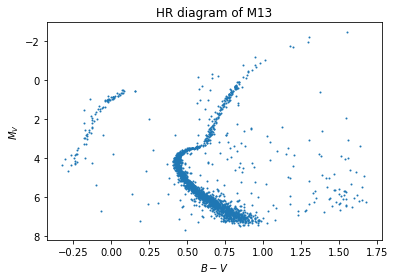

In [9]:
plt.scatter(data['B-V'], data['M_V'], s=1 )

plt.title('HR diagram of M13')
plt.xlabel('$B-V$')
plt.ylabel('$M_V$')
plt.gca().invert_yaxis()

plt.show()